In [15]:
import pandas as pd
import json

In [16]:
with open('/home/sd3528/hetav-2/top_100_pred_map_all.json') as f:
    data = json.load(f)

In [17]:
data

{'0': [{'text': "Its failure of Indian judiciary... It doesn't exist",
   'label': 0.0,
   'prob': 0.9997120499610901},
  {'text': 'Ye ladka fasi to deserve karta hi Hai.. case file karte vakt vo minor aur Alcohol consume karte vakt 2 people Ki jaan lete vakt Vo Adult... Wow.. There is no significance of our constitution and Laws In Rich peoples case..  sacchai kuch aisi hai Ki government paiso me bik jati Hai.. because political leaders bhikari hai.. unko paisa de do ki vo bik jaate Hai... Kya hi chal raha India me. Dictatorship nahi to Kya..',
   'label': 0.0,
   'prob': 0.49575284123420715},
  {'text': 'Authorities should set an example in this matter.',
   'label': 0.0,
   'prob': 0.9880038499832153},
  {'text': "A minor drinking is crime, driving is crime, and moreover by doing so killing a person is not only an act of negligence but murder.\nA single act of crime may be considered negligence. But, when such negligence lead to another henoius crime , it's surely a crime that deman

In [18]:
def label_to_text(label):
    label = int(label)
    label = label + 1
    if label == 1 or label == 2.0:
        return "Judicial Accountability and Policy Demands"
    elif label == 2:
        return "Public Safety"
    elif label == 3:
        return "Socioeconomic Privilege"
    elif label == 4 or label == 5.0:
        return "Victim Sympathy"
    elif label == 5 or label == 6.0:
        return "Anger or Outrage"
    elif label == 6 or label == 7.0:
        return "Irrelevant/General Comments"
    elif label == 7:
        return "Views on Similar Cases in the Past"
    else:
        return "Unknown Label Value" + str(label)

In [19]:
import uuid

In [20]:
comments = []
for label in range(7):
  texts_label = data[str(label)]
  # sort by 'prob'
  texts_label = sorted(texts_label, key=lambda x: x['prob'], reverse=True)
  # get top 100
  texts_label = texts_label[:100]
  
  for t in texts_label:
    comments.append({
      'id': str(uuid.uuid4()),
      'text': t['text'],
      'llm_label': label,
      'llm_label_text': label_to_text(label),
      'prob': t['prob'],
      'human_label': '',      
    })

In [21]:
len(comments)

700

In [22]:
df_majority_sample = pd.DataFrame(comments)
df_majority_sample['text'] = df_majority_sample['text'].astype(str)
df_majority_sample.to_csv('/home/sd3528/hetav-2/top_100_pred_llm.csv', index=False)

In [23]:
df_majority_human_annotate = df_majority_sample
df_majority_human_annotate = df_majority_human_annotate.sample(frac=1).reset_index(drop=True)
df_majority_human_annotate.drop(columns=['llm_label','llm_label_text', 'prob'], inplace=True)

In [24]:
df_majority_human_annotate

,id,text,human_label
0,0933ba35-b3ee-4dd3-8309-c4bd0d128666,Em clear ga cheppav :party_popper:nice :thumbs...,
1,a75b4d0d-a089-478f-a615-432109ffafaa,Paisa is sab hai ... Our system is totally cor...,
2,461c8dd7-449f-4789-a3a2-67a3efd72074,We want justice.....the value of their lives z...,
3,267daf2c-7cde-4b0d-8688-b8fa1d0bed55,I lived in ahmednagar.. And i found that u nee...,
4,67e905d8-2823-4241-b1fd-7b88e677a4a9,"You always covered the news really well ,comm...",
...,...,...,...
695,bb3731f5-977b-43e8-9cc4-39c94e61c6a4,I am from Indore and I don’t hesitate to accep...,
696,27694197-80f1-4cf4-8f9d-de4cc336f789,Indian judiciary system fucked up....I persona...,
697,80f9e4ea-773d-46be-9779-6f9699b5b1d0,Money is everything in India. You have money a...,
698,5bc925eb-3ebb-4081-ab1e-e7ba41937fb9,Nothing changed in 10 years .people are being ...,


In [25]:
df_majority_human_annotate.to_csv('/home/sd3528/hetav-2/top_100_majority_human_annotate.csv', index=False)

# check human and llm

In [1]:
import pandas as pd
df_majority_llm = pd.read_csv('/home/sd3528/hetav-2/data/top_100_pred_llm.csv')
df_majority_anisha = pd.read_csv('/home/sd3528/hetav-2/data/top_100_majority_human_annotate_anisha.csv')
df_majority_hetav = pd.read_csv('/home/sd3528/hetav-2/data/top_100_majority_human_annotate_hetav.csv')

In [2]:
df_majority_anisha['human_label_anisha'] = df_majority_anisha['human_label'].apply(lambda x: int(x) - 1)
df_majority_hetav['human_label_hetav'] = df_majority_hetav['human_label'].apply(lambda x: int(x) - 1)

In [3]:
df_majority_anisha.drop(columns=['human_label', 'text'], inplace=True)
df_majority_hetav.drop(columns=['human_label', 'text'], inplace=True)

In [4]:
df_majority_human = df_majority_llm.merge(df_majority_anisha[['id', 'human_label_anisha']], on='id', how='left')
df_majority_human = df_majority_human.merge(df_majority_hetav[['id', 'human_label_hetav']], on='id', how='left')

In [21]:
df_majority_human

,id,text,llm_label,llm_label_text,prob,human_label,human_label_anisha,human_label_hetav
0,7fcfbb2b-c535-4d02-b933-30b7a60e420a,Our judiciary is a joke :crying_face:,0,Judicial Accountability and Policy Demands,1.0,NaN,0,0
1,6fd56878-a98e-468d-b130-3e3278f6cf98,Current Indian judiciary is a joke. It need im...,0,Judicial Accountability and Policy Demands,1.0,NaN,0,0
2,10f437e6-a0c6-4d32-8107-2a91d341eda1,Indian judiciary is a joke. They proved it mul...,0,Judicial Accountability and Policy Demands,1.0,NaN,0,0
3,89f8d3e9-0584-46ef-b261-084d7d60696e,Indian judiciary is just a mockery. It’s a jok...,0,Judicial Accountability and Policy Demands,1.0,NaN,0,0
4,9f309842-c05e-4d69-aaf8-d68be83bd282,Our judiciary is a joke :face_with_tears_of_joy:,0,Judicial Accountability and Policy Demands,1.0,NaN,0,0
...,...,...,...,...,...,...,...,...
695,e3a1fcd8-f699-4621-a839-196ce43fd363,Same as Salman Khan case.. The poor driver too...,6,Irrelevant/General Comments,1.0,NaN,6,6
696,e1d0b35d-995f-4a78-a67c-44163a1d3961,Same incident happened in Nagpur on Ramjhula w...,6,Irrelevant/General Comments,1.0,NaN,6,6
697,0eca8bc2-bda5-43ce-b4b3-0621afdc6e1a,Same case happened in Jaipur big madical compa...,6,Irrelevant/General Comments,1.0,NaN,6,6
698,4de94e2f-6207-48a2-b040-ef2eae3f3a48,"In Feb 2024, same incidence happened in Nagpur...",6,Irrelevant/General Comments,1.0,NaN,6,6


In [30]:
df_majority_human.to_csv('/home/sd3528/hetav-2/data/top_100_majority_human_llm_comb.csv', index=False)

In [23]:
df_majority_human.drop(columns=['human_label'], inplace=True)

In [ ]:
def calc_cohen_kappa(df, col1, col2):
    from sklearn.metrics import cohen_kappa_score
    kappa = cohen_kappa_score(df[col1], df[col2])
    return kappa
def calc_krippendorff_alpha(df, col1, col2):
    import krippendorff
    alpha = krippendorff.alpha(reliability_data=df[[col1, col2]].values)    
    return alpha

In [29]:
print("Cohen's Kappa between Anisha and Hetav: ", calc_cohen_kappa(df_majority_human, 'human_label_anisha', 'human_label_hetav'))
print("Krippendorff's Alpha between Anisha and Hetav: ", calc_krippendorff_alpha(df_majority_human, 'human_label_anisha', 'human_label_hetav'))

Cohen's Kappa between Anisha and Hetav:  0.9696592444188662
Krippendorff's Alpha between Anisha and Hetav:  -0.0005716555077666108


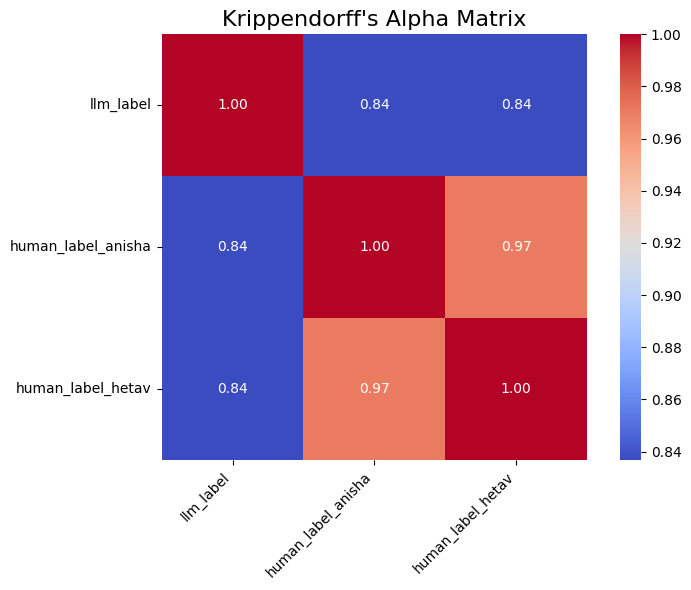

In [31]:
import pandas as pd
import krippendorff
import numpy as np

# Assuming df_majority_human is already loaded
llm_label = df_majority_human['llm_label']
human_label_anisha = df_majority_human['human_label_anisha']
human_label_hetav = df_majority_human['human_label_hetav']

# Prepare all label sets
labels_dict = {
    'llm_label': llm_label,
    'human_label_anisha': human_label_anisha,
    'human_label_hetav': human_label_hetav
}

# Function to compute Krippendorff's alpha between two annotators
def compute_alpha(labels1, labels2):
    # Stack the two label lists together
    data = np.array([labels1.tolist(), labels2.tolist()])
    return krippendorff.alpha(reliability_data=data)

# Create empty DataFrame to store results
raters = list(labels_dict.keys())
alpha_matrix = pd.DataFrame(index=raters, columns=raters)

# Fill the 3x3 matrix
for rater1 in raters:
    for rater2 in raters:
        alpha_value = compute_alpha(labels_dict[rater1], labels_dict[rater2])
        alpha_matrix.loc[rater1, rater2] = round(alpha_value, 4)
        
import matplotlib.pyplot as plt
import seaborn as sns

# Convert matrix values to numeric (important, because right now they are strings)
alpha_matrix_numeric = alpha_matrix.astype(float)

plt.figure(figsize=(8,6))
sns.heatmap(alpha_matrix_numeric, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)

plt.title("Krippendorff's Alpha Matrix", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

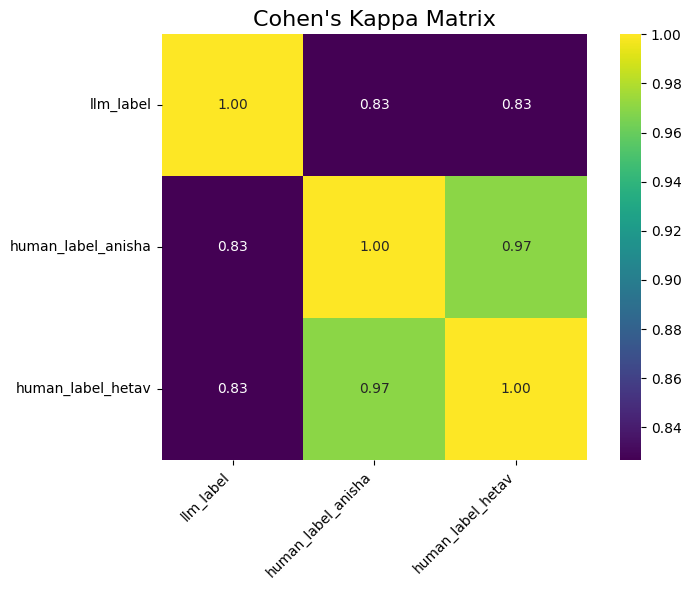

In [34]:
from sklearn.metrics import cohen_kappa_score
import pandas as pd
import numpy as np

# Assuming df_majority_human is already loaded
llm_label = df_majority_human['llm_label']
human_label_anisha = df_majority_human['human_label_anisha']
human_label_hetav = df_majority_human['human_label_hetav']

# Prepare all label sets
labels_dict = {
    'llm_label': llm_label,
    'human_label_anisha': human_label_anisha,
    'human_label_hetav': human_label_hetav
}

# Function to compute Cohen's kappa between two annotators
def compute_kappa(labels1, labels2):
    return cohen_kappa_score(labels1, labels2)

# Create empty DataFrame to store results
raters = list(labels_dict.keys())
kappa_matrix = pd.DataFrame(index=raters, columns=raters)

# Fill the 3x3 matrix
for rater1 in raters:
    for rater2 in raters:
        if rater1 == rater2:
            kappa_value = 1.0  # Agreement with self is perfect
        else:
            kappa_value = compute_kappa(labels_dict[rater1], labels_dict[rater2])
        kappa_matrix.loc[rater1, rater2] = round(kappa_value, 4)

import matplotlib.pyplot as plt
import seaborn as sns

# Convert matrix values to numeric (they are probably strings after rounding)
kappa_matrix_numeric = kappa_matrix.astype(float)

plt.figure(figsize=(8,6))
sns.heatmap(kappa_matrix_numeric, annot=True, fmt=".2f", cmap="viridis", cbar=True, square=True)

plt.title("Cohen's Kappa Matrix", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [9]:
# number of disagreements  between human annotators only
compare = [df_majority_anisha.iloc[i]['human_label_anisha'] == df_majority_hetav.iloc[i]['human_label_hetav'] for i in range(len(df_majority_anisha))]

# disagreements
disagreements = [i for i in range(len(compare)) if compare[i] == False]
len(disagreements)


18

Mkae dataset for train

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_annotate_first = pd.read_csv('/home/sd3528/hetav-2/data/2700_comments_final_labeled.csv')

In [3]:
df_annotate_first['label'].value_counts()

label
6    1065
5     715
7     266
3     231
1     231
4     141
2      58
Name: count, dtype: int64

In [4]:
df_annotate_first['label'] = df_annotate_first['label'].apply(lambda x: int(x) - 1)
df_annotate_first['label'].value_counts()

label
5    1065
4     715
6     266
2     231
0     231
3     141
1      58
Name: count, dtype: int64

In [5]:
df_majority_sampling = pd.read_csv('/home/sd3528/hetav-2/data/top_100_majority_human_annotate_corrected.csv')
df_majority_sampling

,id,text,human_label
0,0933ba35-b3ee-4dd3-8309-c4bd0d128666,Em clear ga cheppav :party_popper:nice :thumbs...,6
1,a75b4d0d-a089-478f-a615-432109ffafaa,Paisa is sab hai ... Our system is totally cor...,5
2,461c8dd7-449f-4789-a3a2-67a3efd72074,We want justice.....the value of their lives z...,4
3,267daf2c-7cde-4b0d-8688-b8fa1d0bed55,I lived in ahmednagar.. And i found that u nee...,2
4,67e905d8-2823-4241-b1fd-7b88e677a4a9,"You always covered the news really well ,comm...",6
...,...,...,...
695,bb3731f5-977b-43e8-9cc4-39c94e61c6a4,I am from Indore and I don’t hesitate to accep...,2
696,27694197-80f1-4cf4-8f9d-de4cc336f789,Indian judiciary system fucked up....I persona...,1
697,80f9e4ea-773d-46be-9779-6f9699b5b1d0,Money is everything in India. You have money a...,3
698,5bc925eb-3ebb-4081-ab1e-e7ba41937fb9,Nothing changed in 10 years .people are being ...,2


In [6]:
df_majority_sampling['human_label'].value_counts()

human_label
5    133
6    123
1    106
3    100
7     98
4     93
2     47
Name: count, dtype: int64

In [7]:
df_majority_sampling['label'] = df_majority_sampling['human_label'].apply(lambda x: int(x) - 1)
df_majority_sampling['label'].value_counts()

label
4    133
5    123
0    106
2    100
6     98
3     93
1     47
Name: count, dtype: int64

In [8]:
df_total = pd.concat([df_majority_sampling, df_annotate_first])

In [9]:
df_total

,id,text,human_label,label,Serial_Number,llm_model,Label_Topic
0,0933ba35-b3ee-4dd3-8309-c4bd0d128666,Em clear ga cheppav :party_popper:nice :thumbs...,6.0,5,NaN,NaN,NaN
1,a75b4d0d-a089-478f-a615-432109ffafaa,Paisa is sab hai ... Our system is totally cor...,5.0,4,NaN,NaN,NaN
2,461c8dd7-449f-4789-a3a2-67a3efd72074,We want justice.....the value of their lives z...,4.0,3,NaN,NaN,NaN
3,267daf2c-7cde-4b0d-8688-b8fa1d0bed55,I lived in ahmednagar.. And i found that u nee...,2.0,1,NaN,NaN,NaN
4,67e905d8-2823-4241-b1fd-7b88e677a4a9,"You always covered the news really well ,comm...",6.0,5,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2702,Ugy6jRuTrKk514u6N2Z4AaABAg,Where is our PM in all this? Modi bhai? Alive?,NaN,4,2515.0,llama3:70b,Anger or Outrage
2703,UgzTIrQ-FtAWrbnRIil4AaABAg,I need to know today's Juvenile Justice Act ca...,NaN,4,2348.0,llama3:70b,Anger or Outrage
2704,UgxfME6X-E8x_ZNXVBZ4AaABAg,Builders have no respect for people money... t...,NaN,4,1609.0,llama3:70b,Anger or Outrage
2705,Ugy4jhkIWb5wFJoFWO54AaABAg,Doc/judge reserved category se hai. Reservatio...,NaN,4,2542.0,llama3:70b,Anger or Outrage


In [10]:
df_total['label'].value_counts()

label
5    1188
4     848
6     364
0     337
2     331
3     234
1     105
Name: count, dtype: int64

In [11]:
test_texts = pd.read_csv('/home/sd3528/hetav-2/data/test.csv')['text'].tolist()

In [14]:
final_dataset = []
count = 0
for d in df_total.to_dict(orient='records'):
  if d['text'] in test_texts:
    count += 1
  else:
    final_dataset.append({
      'text':d['text'],
      'label':d['label']
    })

In [15]:
len(final_dataset)

3103

In [16]:
df_majority_dataset = pd.DataFrame(final_dataset)

In [17]:
df_majority_dataset = df_majority_dataset.sample(frac=1)

In [18]:
df_majority_dataset

,text,label
2645,Judge pe case karo,4
735,Some one not like this coment \r\n\r\nFor Driv...,1
1410,As a government doctor I am really ashamed‚Ä¶....,5
2587,Neet aspirants want justice @druv_ rathee,5
3046,We want same punishment\r\nWe want justice\r\n...,0
...,...,...
2345,What happened to Palki? It seems she is gettin...,5
88,His parents should also be punished to allow d...,4
3027,Ya hi mahan baba shabh ka sambhidhan thu hai A...,5
1226,Great work,5


In [22]:
df_majority_train = df_majority_dataset[:round(0.9*len(df_majority_dataset))]
df_majority_test = df_majority_dataset[round(0.9*len(df_majority_dataset)):]

In [23]:
len(df_majority_train), len(df_majority_test)

(2793, 310)

In [24]:
df_majority_train

,text,label
2645,Judge pe case karo,4
735,Some one not like this coment \r\n\r\nFor Driv...,1
1410,As a government doctor I am really ashamed‚Ä¶....,5
2587,Neet aspirants want justice @druv_ rathee,5
3046,We want same punishment\r\nWe want justice\r\n...,0
...,...,...
605,Indian judiciary is a Joke:clown_face:,0
452,Poor girl. May her soul rest in peace.,3
132,Insurance company will use this video for mark...,5
1103,Ok Rahulji to fir Bhopal gas durghatna main to...,6


In [25]:
df_majority_test

,text,label
18,"Bolta achha hai ,kahani ko seriousness showing...",5
1991,I imagine what would the judge do if those per...,4
2038,Indian judiciary system:face_with_tears_of_joy:,0
1234,I guess the family must be wanting the teen to...,4
2252,These foolish parents allow him to swim and ge...,4
...,...,...
2345,What happened to Palki? It seems she is gettin...,5
88,His parents should also be punished to allow d...,4
3027,Ya hi mahan baba shabh ka sambhidhan thu hai A...,5
1226,Great work,5


In [26]:
df_majority_train.to_csv('/home/sd3528/hetav-2/data/majority-sampling/train_majority_sampling.csv')
df_majority_test.to_csv('/home/sd3528/hetav-2/data/majority-sampling/valid_majority_sampling.csv')